In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [2]:

pd.set_option('display.max_rows',None)
df1=pd.read_csv('hRUoRL.csv')
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [101]:
df1.shape

(506, 14)

# Assumption 1 - y numeric

# Assumption 2 - No Multicollinearity

In [3]:
# VIF
df1.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

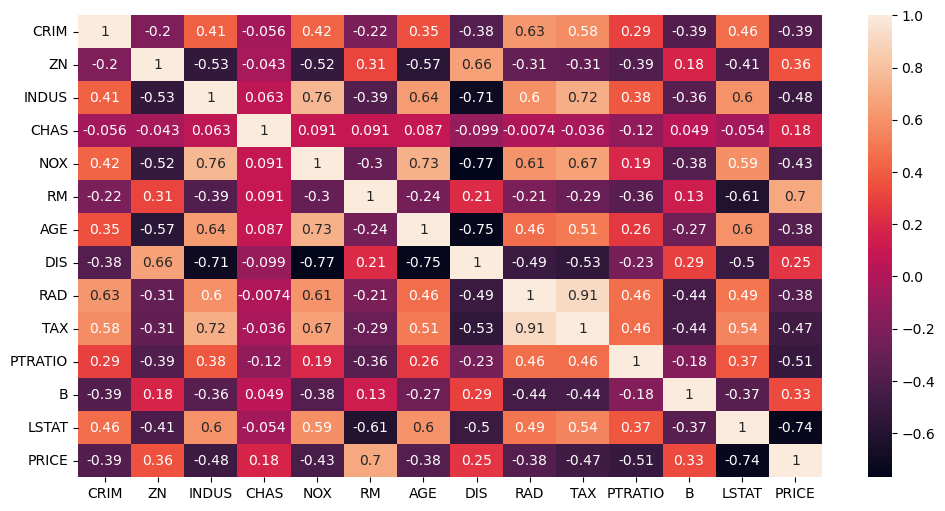

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(),annot=True)

In [5]:
X=df1.drop('PRICE',axis=1)
y=df1['PRICE']
Xc=sm.add_constant(X)

In [6]:
VIF(Xc.values,1)

1.792191547433241

In [7]:
vif_value = [VIF(Xc.values , i) for i in range(Xc.shape[1])]
pd.DataFrame(vif_value, columns = ['VIF_Value'],index = Xc.columns).sort_values('VIF_Value', ascending=False)


,VIF_Value
const,585.265238
TAX,9.008554
RAD,7.484496
NOX,4.393720
INDUS,3.991596
DIS,3.955945
AGE,3.100826
LSTAT,2.941491
ZN,2.298758
RM,1.933744


# ASSUMPTION 3 LINEAR RELATIONSHIP

In [8]:
ols_model=sm.OLS(y,Xc).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 05 May 2023   Prob (F-statistic):          6.72e-135
Time:                        00:01:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
y_pred=ols_model.fittedvalues
residuals=ols_model.resid

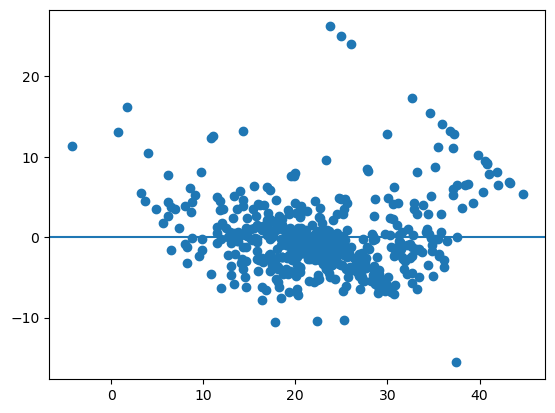

In [10]:
plt.scatter(y_pred,residuals)
plt.axhline(0)

# Assumption 4 - No correlation

In [11]:
from statsmodels.stats.api import durbin_watson
durbin_watson(residuals)

1.0783751186797235

In [12]:

# there is autocorrelation the assumption is valid.

# Assumption 5 - Homoscedasticity or   no Heteroscedasticity

# Bresuch Pan test

In [13]:
from statsmodels.stats.api import het_breuschpagan
het_breuschpagan(residuals,Xc)[2:] # 3rd is tstsctics and 4th is pvalue

(5.590226641705057, 1.4957755130729886e-09)

In [14]:
# since pvalue is low reject h0 i.e. error terms are heteroscedastics

In [15]:
het_breuschpagan(residuals,Xc)# 1stvalue = ,2ndvalue = ,3rdvalue = tstats, 4thvalue = pvalue , first two value is not important 

(65.12178613716236,
 6.265430719874989e-09,
 5.590226641705057,
 1.4957755130729886e-09)

# Assumption 6- Normality of Residuals

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

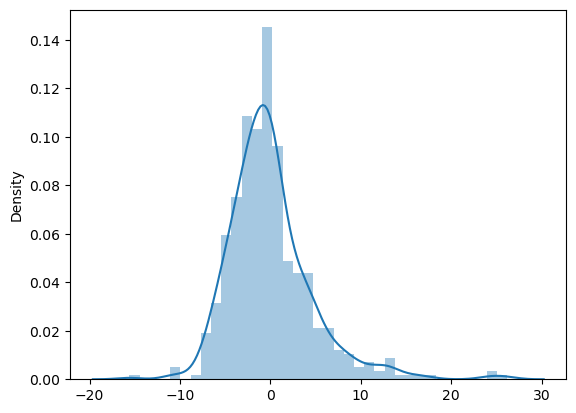

In [16]:
sns.distplot(residuals)

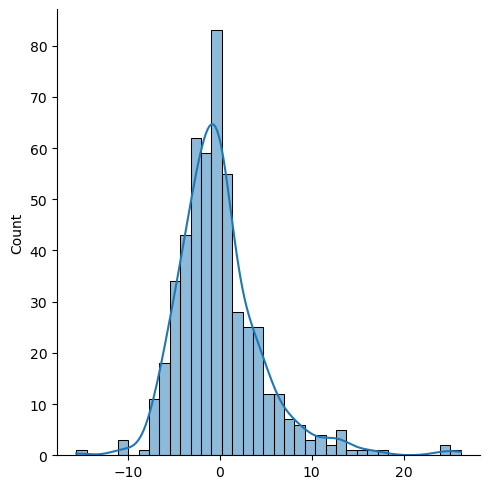

In [17]:
sns.displot(residuals,kde=True)

In [18]:
stats.shapiro(residuals)

ShapiroResult(statistic=0.9013806581497192, pvalue=1.480177833053824e-17)

In [19]:
# since p< 0.05 reject h0 residuals are not normal

In [20]:
from statsmodels.stats.api import jarque_bera
# h0: data is normal
stat, pval,res_skew,res_kurt=jarque_bera(residuals)
pval

8.836685621030912e-171

In [21]:
# since p < 0.05 reject h0 residual is not normal

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

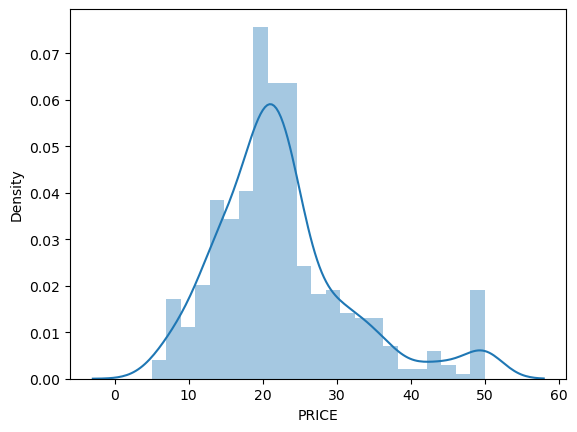

In [22]:
sns.distplot(y)

In [23]:
# try log transformation of y variable
logy= np.log(y) 

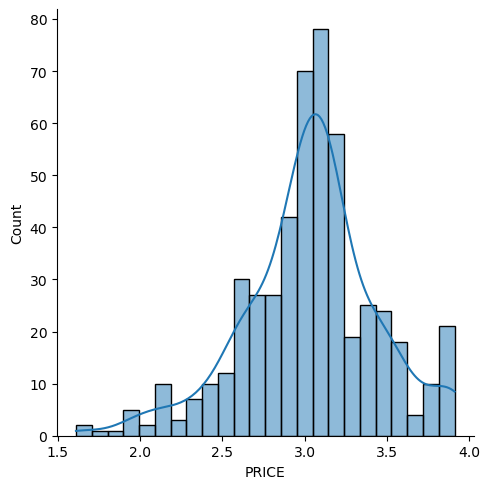

In [24]:
sns.displot(logy,kde=True)

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

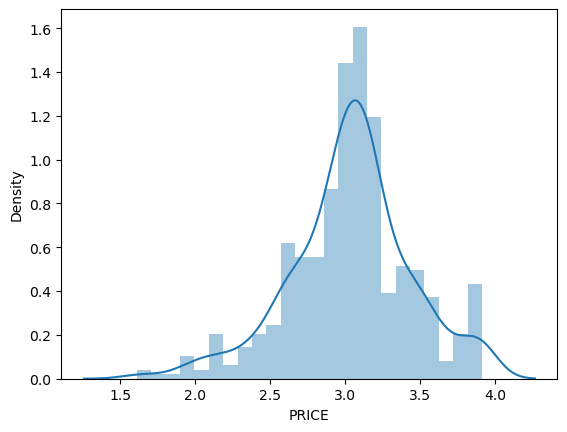

In [25]:
sns.distplot(logy)

In [26]:
y.skew()

1.1080984082549072

In [27]:
logy.skew()

-0.33032129530987864

In [28]:
# build a model of logy
ols_model= sm.OLS(logy,Xc).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     142.1
Date:                Fri, 05 May 2023   Prob (F-statistic):          4.07e-157
Time:                        00:01:26   Log-Likelihood:                 129.61
No. Observations:                 506   AIC:                            -231.2
Df Residuals:                     492   BIC:                            -172.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1020      0.204     20.081      0.000       3.701       4.503
CRIM          -0.0103      0.001     -7.808      0.000      -0.013      -0.008
ZN             0.0012      0.001      2.134      0.033    9.29e-05       0.002
INDUS          0.0025      0.002      1.002      0.317      -0.002       0.007
CHAS           0.1009      0.034      2.925      0.004       0.033       0.169
NOX           -0.7784      0.153     -5.091      0.000      -1.079      -0.478
RM             0.0908      0.017      5.430      0.000       0.058       0.124
AGE            0.0002      0.001      0.398      0.691      -0.001       0.001
DIS           -0.0491      0.008     -6.149      0.000      -0.065      -0.033
RAD            0.0143      0.003      5.373      0.000       0.009       0.019
TAX           -0.0006      0.000     -4.157      0.000      -0.001      -0.000
PTRATIO       -0.0383      0.005     -7.309      0.000      -0.049      -0.028
B              0.0004      0.000      3.847      0.000       0.000       0.001
LSTAT         -0.0290      0.002    -14.304      0.000      -0.033      -0.025
==============================================================================
Omnibus:                       59.863   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.459
Skew:                           0.466   Prob(JB):                     4.06e-50
Kurtosis:                       6.150   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

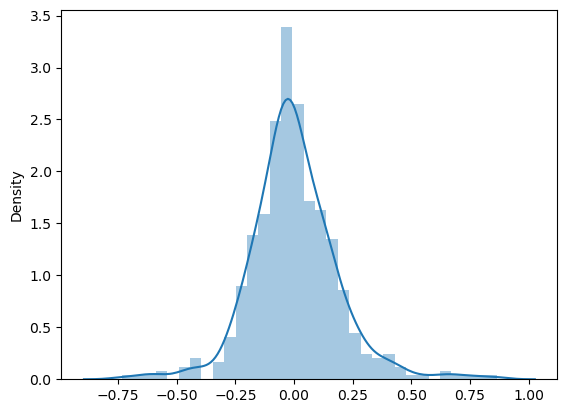

In [29]:
residuals=ols_model.resid
sns.distplot(residuals)

In [30]:
stats.shapiro(residuals)

ShapiroResult(statistic=0.9517022371292114, pvalue=8.417074329192253e-12)

In [31]:
# pval < 0.05 h0 is rejected data is not normal.

# Model Evaluation

In [32]:
pd.set_option('display.max_rows',None)
df3=pd.read_csv('hRUoRL.csv')
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [33]:
X=df3.drop('PRICE',axis=1)
y=df3['PRICE']

In [34]:
y.head(3)

0    24.0
1    21.6
2    34.7
Name: PRICE, dtype: float64

In [35]:
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [38]:
X_train.shape

(354, 13)

In [39]:
X_test.shape

(152, 13)

In [40]:
y_train.shape

(354,)

In [41]:
y_test.shape

(152,)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()
lr.fit(X_train,y_train) # training model

LinearRegression()

In [44]:
y_pred_test= lr.predict(X_test) # get prediction
y_pred_test

array([34.01651319, 31.05189517, 22.33884524, 18.0838353 , 20.56688064,
       25.98808555, 26.01540609, 23.82611577, 22.21599346, 19.28360875,
       26.66123555, 16.98260577, 20.99150244, 15.24603617, 41.09899335,
       20.25245593, 28.49362648, 19.02746332, 32.1219971 , 40.55013347,
       34.85510783, 16.62558247, 20.26594393, 17.78965573, 13.61712506,
       12.31506816, 27.30863471, 20.08837791, 18.3960775 , 20.36652738,
       15.63267698, 24.40174268, 38.95380335, 24.82674   , 31.67752332,
       28.52641185, 14.69895345, 14.24630553, 16.49088419, 23.30593651,
       23.14883147, 23.67414203, 13.62859392, 21.35912779, 31.4375316 ,
       26.93449598, 19.05250575, 16.18779463, 16.95967267, 12.540738  ,
       21.69054323, 20.12269149, 23.8317502 , 24.2081579 , 11.78551306,
       14.84388066, 25.02378959, 33.63041801, 10.04068529, 21.02680054,
       17.26643982, 19.29350402, 18.0135788 , 30.0595925 , 21.27173516,
       25.42909898, 15.88028621, 25.28296871, 22.47917188, 20.74

In [45]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [46]:
test_r2=r2_score(y_test,y_pred_test)
print('test_r2 ',test_r2)
test_mse=mean_squared_error(y_test,y_pred_test)
print('test_mse ', test_mse)
test_rmse=mean_absolute_error(y_test,y_pred_test)
print('test_rmse ', test_rmse)
test_mae=mean_absolute_error(y_test,y_pred_test)
print('test_mae ', test_mae)
test_mape=mean_absolute_percentage_error(y_test,y_pred_test)
print('test_mape ', test_mape)

test_r2  0.7057919873264544
test_mse  29.79884430147879
test_rmse  3.4719478482701565
test_mae  3.4719478482701565
test_mape  0.1709035158870141


In [47]:
y_pred_train=lr.predict(X_train)

In [48]:
train_r2=r2_score(y_train,y_pred_train)
print('train_r2 ',train_r2)
train_mse=mean_squared_error(y_train,y_pred_train)
print('train_mse ', train_mse)
train_rmse=mean_absolute_error(y_train,y_pred_train)
print('train_rmse ', train_rmse)
train_mae=mean_absolute_error(y_train,y_pred_train)
print('train_mae ', train_mae)
train_mape=mean_absolute_percentage_error(y_train,y_pred_train)
print('train_mape ', train_mape)

train_r2  0.752890983596846
train_mse  19.06739115538505
train_rmse  3.127349805330659
train_mae  3.127349805330659
train_mape  0.15691696786013745


# Day3

In [49]:
from warnings import filterwarnings
filterwarnings('ignore')

#pd.options.display.max_columns = None
pd.options.display.max_rows = None
 
#to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

#import train-test split 
from sklearn.model_selection import train_test_split

#import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import various functions from scipy
from scipy import stats

# import 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

#import StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

#functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

#functions for linear regression
from sklearn.linear_model import LinearRegression

#functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [50]:
pd.set_option('display.max_rows',None)
df3=pd.read_csv('hRUoRL.csv')
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,6.062200,3,222,18.700000,396.900000,5.330000,36.200000


In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)


train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("train RMSE ", train_rmse)
print("test RMSE ", test_rmse)

result_lr = ['LR Full model', train_r2, test_r2, train_rmse, test_rmse]
result_lr

Train R2  0.752890983596846
Test R2   0.7057919873264544
train RMSE  4.366622396702633
test RMSE  5.458831770761835


['LR Full model',
 0.752890983596846,
 0.7057919873264544,
 4.366622396702633,
 5.458831770761835]

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [53]:
# SFS Forward
lr=LinearRegression()
lr_sfs= sfs(estimator=lr,k_features=5, forward=True)
sfs_forward=lr_sfs.fit(X_train,y_train)
forward_features=list(sfs_forward.k_feature_names_)
forward_features

['CHAS', 'RM', 'PTRATIO', 'B', 'LSTAT']

In [54]:
# Forward in range
lr=LinearRegression()
lr_sfs= sfs(estimator=lr,k_features=(4,8), forward=True)
sfs_forward_range=lr_sfs.fit(X_train,y_train)
forward_features_range=list(sfs_forward_range.k_feature_names_)
forward_features_range

['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

In [55]:
# Forward best
lr=LinearRegression()
lr_sfs= sfs(estimator=lr,k_features='best', forward=True)
sfs_forward_best=lr_sfs.fit(X_train,y_train)
forward_features_best=list(sfs_forward_best.k_feature_names_)
forward_features_best

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [56]:
# Forward best
lr=LinearRegression()
lr_sfs= sfs(estimator=lr,k_features='best', forward=True,verbose=2)   # verbose=0 by default no info ,verbose=1 some info,
sfs_forward_best=lr_sfs.fit(X_train,y_train)                          # verbose=2 more info
forward_features_best=list(sfs_forward_best.k_feature_names_)
forward_features_best

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2023-05-05 00:01:29] Features: 1/13 -- score: 0.5261603029632435[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2023-05-05 00:01:29] Features: 2/13 -- score: 0.6241817903347533[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2023-05-05 00:01:29] Features: 3/13 -- score: 0.6706654496693151[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [57]:
# SFS Backward

In [58]:
lr=LinearRegression()
lr_sfs= sfs(estimator=lr,k_features=5, forward=False)
sfs_backward=lr_sfs.fit(X_train,y_train)
backward_features=list(sfs_backward.k_feature_names_)
backward_features

['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']

In [59]:
# backward in range
lr=LinearRegression()
lr_sfs= sfs(estimator=lr,k_features=(4,8), forward=False)
sfs_backward_range=lr_sfs.fit(X_train,y_train)
backward_features_range=list(sfs_backward_range.k_feature_names_)
backward_features_range

['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [60]:
# backward best
lr=LinearRegression()
lr_sfs= sfs(estimator=lr,k_features='best', forward=False)
sfs_backward_best=lr_sfs.fit(X_train,y_train)
backward_features_best=list(sfs_backward_best.k_feature_names_)
backward_features_best

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [61]:
# RFE 
from sklearn.feature_selection import RFE

In [62]:
lr=LinearRegression()
lr_rfe= RFE(estimator=lr,n_features_to_select=5)
rfe_model=lr_rfe.fit(X_train,y_train)
rfe_model.ranking_

array([3, 5, 9, 1, 1, 1, 7, 1, 4, 6, 1, 8, 2])

In [63]:
rfe_rank=pd.DataFrame()
rfe_rank['rank']=rfe_model.ranking_
rfe_rank['features']=X_train.columns
rfe_list= list(rfe_rank['features'])
rfe_list

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [64]:
lr=LinearRegression()
lr.fit(X_train[rfe_list],y_train)  # only selected column
y_pred_train=lr.predict(X_train[rfe_list])
y_pred_test= lr.predict(X_test[rfe_list])
train_r2=r2_score(y_train,y_pred_train)
test_r2=r2_score(y_test,y_pred_test)
print('train_r2 ',train_r2 )
print('test_r2 ',test_r2 )
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("train RMSE ", train_rmse)
print("test RMSE ", test_rmse)

result_lr = ['LR Full model', train_r2, test_r2, train_rmse, test_rmse]
result_lr

train_r2  0.752890983596846
test_r2  0.7057919873264544
train RMSE  4.366622396702633
test RMSE  5.458831770761835


['LR Full model',
 0.752890983596846,
 0.7057919873264544,
 4.366622396702633,
 5.458831770761835]

In [65]:
lr = LinearRegression()
lr.fit(X_train[backward_features_best], y_train) # only selected columns


y_pred_train = lr.predict(X_train[backward_features_best]) # only selected columns
y_pred_test = lr.predict(X_test[backward_features_best]) # only selected columns


train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("train RMSE ", train_rmse)
print("test RMSE ", test_rmse)

result_back = ['backword', train_r2, test_r2, train_rmse, test_rmse]
result_back

Train R2  0.752434513097503
Test R2   0.7081692908935959
train RMSE  4.370653643087017
test RMSE  5.436732403284541


['backword',
 0.752434513097503,
 0.7081692908935959,
 4.370653643087017,
 5.436732403284541]

In [66]:
lr = LinearRegression()
lr.fit(X_train[forward_features_best], y_train) # only selected columns


y_pred_train = lr.predict(X_train[forward_features_best]) # only selected columns
y_pred_test = lr.predict(X_test[forward_features_best]) # only selected columns


train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("train RMSE ", train_rmse)
print("test RMSE ", test_rmse)

result_forward = ['forward', train_r2, test_r2, train_rmse, test_rmse]
result_forward

Train R2  0.752434513097503
Test R2   0.7081692908935959
train RMSE  4.370653643087017
test RMSE  5.436732403284541


['forward',
 0.752434513097503,
 0.7081692908935959,
 4.370653643087017,
 5.436732403284541]

In [67]:
lr = LinearRegression()
lr.fit(X_train[rfe_list], y_train) # only selected columns


y_pred_train = lr.predict(X_train[rfe_list]) # only selected columns
y_pred_test = lr.predict(X_test[rfe_list]) # only selected columns


train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("train RMSE ", train_rmse)
print("test RMSE ", test_rmse)

result_rfe = ['rfe', train_r2, test_r2, train_rmse, test_rmse]
result_rfe

Train R2  0.752890983596846
Test R2   0.7057919873264544
train RMSE  4.366622396702633
test RMSE  5.458831770761835


['rfe',
 0.752890983596846,
 0.7057919873264544,
 4.366622396702633,
 5.458831770761835]

In [68]:
# gatheer results
results_df = pd.DataFrame(columns=['Method', 'Train R2', 'Test R2', 'Train RMSE', 'Test RMSE'])
results_df.loc[len(results_df)] = result_lr
results_df.loc[len(results_df)] = result_back
results_df.loc[len(results_df)] = result_forward
results_df.loc[len(results_df)] = result_rfe
results_df.sort_values('Test R2',ascending=False)

,Method,Train R2,Test R2,Train RMSE,Test RMSE
1,backword,0.752435,0.708169,4.370654,5.436732
2,forward,0.752435,0.708169,4.370654,5.436732
0,LR Full model,0.752891,0.705792,4.366622,5.458832
3,rfe,0.752891,0.705792,4.366622,5.458832


In [69]:
from sklearn.model_selection import KFold

In [70]:
# for not use only for understanding
temp_data=[30,31,32,33,34,35,36,37,38,39]
kf=KFold(n_splits=5)
list(kf.split(temp_data))

[(array([2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1])),
 (array([0, 1, 4, 5, 6, 7, 8, 9]), array([2, 3])),
 (array([0, 1, 2, 3, 6, 7, 8, 9]), array([4, 5])),
 (array([0, 1, 2, 3, 4, 5, 8, 9]), array([6, 7])),
 (array([0, 1, 2, 3, 4, 5, 6, 7]), array([8, 9]))]

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
# using cross_val_score function to perform K-fold cross validation
score= cross_val_score(lr,X_train,y_train,cv=5,scoring='r2')
print('cross validate score ', score)
print('Average score ',np.average(score))

cross validate score  [0.62639596 0.72694465 0.82449389 0.73283696 0.66871125]
Average score  0.7158765419764783


In [73]:

lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7057919873264544

In [74]:
temp_pred= lr.predict(X_test)
r2_score(y_test,temp_pred)

0.7057919873264544

In [75]:
# LOOCV
from sklearn.model_selection import LeaveOneOut

In [76]:
loocv=LeaveOneOut()

In [77]:
rmse_loocv = []

for train_index, test_index in loocv.split(X_train, y_train):
    X_train_k = X_train.iloc[train_index]
    X_test_k  = X_train.iloc[test_index]
    
    y_train_k = y_train.iloc[train_index]
    y_test_k  = y_train.iloc[test_index]
    
    lr_k = LinearRegression()
    lr_k.fit(X_train_k, y_train_k)
    y_pred_k = lr_k.predict(X_test_k)
    rmse_K = np.sqrt(mean_squared_error(y_test_k, y_pred_k) )
    #print('RMSE ', rmse_K )
    rmse_loocv.append(rmse_K)

print(rmse_loocv)

[1.680715752420614, 2.138893327378632, 4.264691739938934, 5.769632824475913, 1.0694538297129057, 5.953962797805435, 3.8615356452914895, 0.17650620698792352, 1.582603130840674, 0.09211104521802227, 2.06857179681111, 3.659133414221106, 9.972600831049075, 3.5883807805304, 7.236475115029997, 2.25238019171805, 4.34971115719005, 1.0718007208567393, 0.7356827961500905, 5.226729013355197, 2.86082819937117, 1.2484236020445465, 0.1102098308538082, 1.8328583635788966, 3.796355128846997, 2.114669746514455, 2.406300934282136, 3.2081439977312556, 6.897209677229707, 0.48074991974001335, 1.6945131301239549, 6.109262100356855, 1.9752748694754665, 0.3781861940453197, 0.8757945931065514, 3.7058174069929564, 4.744185439836812, 2.407104529476946, 2.392882100630679, 3.0857885358783115, 12.172209209997764, 2.435455545156586, 0.8979615874352938, 2.5566877823558176, 4.152164600015768, 7.498105116815957, 18.591573114884632, 2.417213464190141, 2.7253876366459657, 4.481303140984576, 0.40703452269523765, 4.9003669

# DAY_4

In [78]:

pd.set_option('display.max_rows',None)
df_housing=pd.read_csv('hRUoRL.csv')
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,6.062200,3,222,18.700000,396.900000,5.330000,36.200000


In [79]:
# not required 
# X=df1.drop('PRICE',axis=1)
# y=df1['PRICE']
# Xc=sm.add_constant(X)

In [80]:
# ols_model=sm.OLS(y,Xc).fit()
# ols_model.summary()

In [81]:
# Xc_temp=Xc.drop('AGE',axis=1)
# temp_model=sm.OLS(y,Xc).fit()

In [82]:
# print('R2 before drop ', ols_model.rsquared )
# print('adj R2 before drop ', ols_model.rsquared_adj )


In [83]:
# print('R2 before drop ', temp_model.rsquared )
# print('adj R2 before drop ', temp_model.rsquared_adj )


In [84]:
# scaling on Xs ----means X1,X2,-----Xn
df_housing_numeric=df_housing[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
df_housing_numeric

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006320,18.000000,2.310000,0.538000,6.575000,65.200000,4.090000,1,296,15.300000,396.900000,4.980000
1,0.027310,0.000000,7.070000,0.469000,6.421000,78.900000,4.967100,2,242,17.800000,396.900000,9.140000
2,0.027290,0.000000,7.070000,0.469000,7.185000,61.100000,4.967100,2,242,17.800000,392.830000,4.030000
3,0.032370,0.000000,2.180000,0.458000,6.998000,45.800000,6.062200,3,222,18.700000,394.630000,2.940000
4,0.069050,0.000000,2.180000,0.458000,7.147000,54.200000,6.062200,3,222,18.700000,396.900000,5.330000
5,0.029850,0.000000,2.180000,0.458000,6.430000,58.700000,6.062200,3,222,18.700000,394.120000,5.210000
6,0.088290,12.500000,7.870000,0.524000,6.012000,66.600000,5.560500,5,311,15.200000,395.600000,12.430000
7,0.144550,12.500000,7.870000,0.524000,6.172000,96.100000,5.950500,5,311,15.200000,396.900000,19.150000
8,0.211240,12.500000,7.870000,0.524000,5.631000,100.000000,6.082100,5,311,15.200000,386.630000,29.930000
9,0.170040,12.500000,7.870000,0.524000,6.004000,85.900000,6.592100,5,311,15.200000,386.710000,17.100000


In [85]:
df_housing_numeric1=df_housing.drop(['CHAS','PRICE'],axis=1)
df_housing_numeric1

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006320,18.000000,2.310000,0.538000,6.575000,65.200000,4.090000,1,296,15.300000,396.900000,4.980000
1,0.027310,0.000000,7.070000,0.469000,6.421000,78.900000,4.967100,2,242,17.800000,396.900000,9.140000
2,0.027290,0.000000,7.070000,0.469000,7.185000,61.100000,4.967100,2,242,17.800000,392.830000,4.030000
3,0.032370,0.000000,2.180000,0.458000,6.998000,45.800000,6.062200,3,222,18.700000,394.630000,2.940000
4,0.069050,0.000000,2.180000,0.458000,7.147000,54.200000,6.062200,3,222,18.700000,396.900000,5.330000
5,0.029850,0.000000,2.180000,0.458000,6.430000,58.700000,6.062200,3,222,18.700000,394.120000,5.210000
6,0.088290,12.500000,7.870000,0.524000,6.012000,66.600000,5.560500,5,311,15.200000,395.600000,12.430000
7,0.144550,12.500000,7.870000,0.524000,6.172000,96.100000,5.950500,5,311,15.200000,396.900000,19.150000
8,0.211240,12.500000,7.870000,0.524000,5.631000,100.000000,6.082100,5,311,15.200000,386.630000,29.930000
9,0.170040,12.500000,7.870000,0.524000,6.004000,85.900000,6.592100,5,311,15.200000,386.710000,17.100000


In [86]:
x_scaler=StandardScaler()
num_scaled=x_scaler.fit_transform(df_housing_numeric)
df_num_scaled=pd.DataFrame(num_scaled,columns=df_housing_numeric.columns)
df_num_scaled.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [87]:
X=pd.concat([df_num_scaled,df_housing['CHAS']],axis=1)
y=df_housing['PRICE']

In [88]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)
train_r2=r2_score(y_train,y_pred_train)
test_r2=r2_score(y_test,y_pred_test)
print('Train R2 =',train_r2)
print('Test R2 =',test_r2)

Train R2 = 0.752890983596846
Test R2 = 0.7057919873264544


In [89]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [90]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
import warnings

# Ridge model

In [91]:
ridge_model=Ridge(alpha=15)
ridge_model.fit(X_train,y_train)
y_pred_train=ridge_model.predict(X_train)
y_pred_test=ridge_model.predict(X_test)
train_r2=r2_score(y_train,y_pred_train)
test_r2=r2_score(y_test,y_pred_test)
print('Train R2 =',train_r2)
print('Test R2 =',test_r2)

Train R2 = 0.7450993194135784
Test R2 = 0.6877730822537943


In [92]:
ridge_model=Ridge(alpha=20)
ridge_model.fit(X_train,y_train)
y_pred_train=ridge_model.predict(X_train)
y_pred_test=ridge_model.predict(X_test)
train_r2=r2_score(y_train,y_pred_train)
test_r2=r2_score(y_test,y_pred_test)
print('Train R2 =',train_r2)
print('Test R2 =',test_r2)

Train R2 = 0.7439414911044644
Test R2 = 0.6867845071153068


In [93]:
lr.coef_

array([-7.69175693e-02,  3.95527497e-02, -6.09889801e-03,  2.63034959e+00,
       -1.31416178e+01,  3.84418005e+00, -1.20624925e-02, -1.37626293e+00,
        2.83925319e-01, -1.40640197e-02, -9.18566330e-01,  1.05783116e-02,
       -4.37960459e-01])

In [94]:
ridge_model.coef_

array([-0.07402291,  0.04511897, -0.05383324,  1.43551092, -0.67502826,
        3.2947069 , -0.01779127, -1.18946055,  0.28534435, -0.01671227,
       -0.80433652,  0.01083487, -0.49614373])

# Lasso model

In [95]:
lasso_model=Lasso(alpha=1)
lasso_model.fit(X_train,y_train)
y_pred_train=lasso_model.predict(X_train)
y_pred_test=lasso_model.predict(X_test)
train_r2=r2_score(y_train,y_pred_train)
test_r2=r2_score(y_test,y_pred_test)
print('Train R2 =',train_r2)
print('Test R2 =',test_r2)

Train R2 = 0.6946131477730639
Test R2 = 0.6403083260400015


In [96]:
lasso_model=Lasso(alpha=20)
lasso_model.fit(X_train,y_train)
y_pred_train=lasso_model.predict(X_train)
y_pred_test=lasso_model.predict(X_test)
train_r2=r2_score(y_train,y_pred_train)
test_r2=r2_score(y_test,y_pred_test)
print('Train R2 =',train_r2)
print('Test R2 =',test_r2)

Train R2 = 0.4376521728224313
Test R2 = 0.35097070413070575


In [97]:
lasso_model.coef_

array([-0.        ,  0.02908461, -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.0156595 ,
       -0.        ,  0.01075663, -0.23890933])

# ElasticNet


In [98]:
em_model= ElasticNet(alpha=1,l1_ratio=0.5)
em_model.fit(X_train,y_train)
y_pred_train=em_model.predict(X_train)
y_pred_test=em_model.predict(X_test) 
train_r2= r2_score(y_train,y_pred_train)
test_r2=r2_score(y_test,y_pred_test)
print('Train R2 =',train_r2)
print('Test R2 =',test_r2)

Train R2 = 0.6979647898054462
Test R2 = 0.6456814252685837


In [99]:
param={'alpha':[0.01,0.1,0.3,0.5],
      'l1_ratio':[0.3,0.5,0.7,0.9]}
algo_name=ElasticNet()
grid_cv=GridSearchCV(estimator=algo_name,param_grid=param,cv=5,scoring='r2')
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

NameError: name 'GridSearchCV' is not defined

In [ ]:
param={'alpha':[0.3,0.5,1,0.7,0.9],
      'l1_ratio':[1,2,0.5,0.7,0.9]}
algo_name=ElasticNet()
grid_cv=GridSearchCV(estimator=algo_name,param_grid=param,cv=5,scoring='r2')
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

In [ ]:
#just for try
param={'alpha':[1,3,5],
      'l1_ratio':[0.13,0.15,0.7,0.94]}
algo_name=ElasticNet()
grid_cv=GridSearchCV(estimator=algo_name,param_grid=param,cv=5,scoring='r2')
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

# Grid Search Ridge

In [ ]:

from sklearn.model_selection import GridSearchCV

In [ ]:
param={'alpha':[0.01,0.1,1,10]}
model=Ridge()
grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=5,scoring='r2')
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

In [ ]:
param={'alpha':[0.01,0.1,1,10,20,30]}
model=Ridge()
grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=5,scoring='r2')
grid_cv.fit(X_train,y_train)
grid_cv.best_params_